### <div class="alert alert-info">Name: Dnyanai Surkutwar <br>Email: dsurkutwar@scu.edu  <br>Student ID: 00001586576 <br><center>Quiz#2<center></div>

In [257]:
## Import libaries 
import pandas as pd
import pickle
import numpy as np
# Import modules for Logistic regression
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
## Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt



In [63]:
## Import the csv file into dataset
d = pd.read_csv('songs.csv',encoding='latin-1') ## I had an issue reading the dataset in the right encoding, so decided to 
                                                ## convert it into utf-8 encoding. 
d.to_csv('songs.csv',index=False,encoding='utf-8') 
## Here, we know what our file encoding is and we are setting index and header as False as we do not want then in our dataFrame

## Reading the csv file into a dataframe
dataset = pd.read_csv('songs.csv',encoding='utf-8')
dataset.head()

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


### PEforming EDA on dataset:

In [64]:
dataset.describe()
## The total number of songs are 7574.
## 50% of the songs are from year 2002.
## 75% of the songs are from year 2006.

,year,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
count,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,...,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000
mean,2001.455902,3.893979,0.853307,-8.817262,107.348267,0.622866,5.384605,0.433843,0.675471,0.010817,...,95.653221,-63.703984,50.057489,-59.515016,68.028067,-87.340055,55.520722,-50.868457,47.490774,0.147742
std,5.815223,0.532561,0.243748,4.377079,24.665030,0.304656,3.572579,0.273826,0.243473,0.013671,...,26.859726,15.970244,14.463524,17.190527,20.381321,30.464274,23.549473,11.701530,12.463966,0.354868
min,1990.000000,0.000000,0.000000,-42.451000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000,...,15.699000,-158.756000,-25.955000,-149.507000,8.415000,-208.819000,-6.359000,-145.599000,7.200000,0.000000
25%,1997.000000,4.000000,0.819250,-10.847000,88.860250,0.372000,2.000000,0.204000,0.500138,0.003000,...,76.498000,-73.050750,40.584500,-70.282500,53.037250,-105.130250,39.196000,-58.058000,38.975250,0.000000
50%,2002.000000,4.000000,0.979000,-7.649000,103.268000,0.701500,6.000000,0.451500,0.718160,0.007000,...,94.632500,-62.661500,49.220000,-58.650000,65.935000,-83.074000,50.895000,-50.892500,46.437500,0.000000
75%,2006.000000,4.000000,1.000000,-5.640000,124.800500,0.892000,9.000000,0.646000,0.887396,0.014000,...,112.708250,-52.982750,58.462000,-47.699750,81.267000,-64.518000,66.593000,-43.292250,55.030250,0.000000
max,2010.000000,7.000000,1.000000,1.305000,244.307000,1.000000,11.000000,1.000000,0.998492,0.541000,...,214.819000,-2.382000,144.985000,1.140000,161.518000,-10.640000,192.417000,-6.497000,110.272000,1.000000


In [65]:
## Lets see the dataset info which shows use the non-null values in the dataframe columns 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 39 columns):
year                        7574 non-null int64
songtitle                   7574 non-null object
artistname                  7574 non-null object
songID                      7574 non-null object
artistID                    7574 non-null object
timesignature               7574 non-null int64
timesignature_confidence    7574 non-null float64
loudness                    7574 non-null float64
tempo                       7574 non-null float64
tempo_confidence            7574 non-null float64
key                         7574 non-null int64
key_confidence              7574 non-null float64
energy                      7574 non-null float64
pitch                       7574 non-null float64
timbre_0_min                7574 non-null float64
timbre_0_max                7574 non-null float64
timbre_1_min                7574 non-null float64
timbre_1_max                7574 non-null float64
tim

In [66]:
## Checking if there are null values in the dataframe columns
dataset.isnull().sum()

year                        0
songtitle                   0
artistname                  0
songID                      0
artistID                    0
timesignature               0
timesignature_confidence    0
loudness                    0
tempo                       0
tempo_confidence            0
key                         0
key_confidence              0
energy                      0
pitch                       0
timbre_0_min                0
timbre_0_max                0
timbre_1_min                0
timbre_1_max                0
timbre_2_min                0
timbre_2_max                0
timbre_3_min                0
timbre_3_max                0
timbre_4_min                0
timbre_4_max                0
timbre_5_min                0
timbre_5_max                0
timbre_6_min                0
timbre_6_max                0
timbre_7_min                0
timbre_7_max                0
timbre_8_min                0
timbre_8_max                0
timbre_9_min                0
timbre_9_m

### Q1.1)

In [67]:
print('The total number of songs in total are :',dataset.songtitle.count()) ## count gives the count of non-null values in the dataframe

The total number of songs in total are : 7574


In [68]:
dataset.Top10.value_counts() ## value_counts() gives us the count of unique values in the dataframe


0    6455
1    1119
Name: Top10, dtype: int64

In [69]:

dataset.Top10[dataset.Top10==1].count() ##Finding out which songs belong to Top10 column by masking the data

1119

In [70]:
print('The number of Top10 songs are: ',dataset.Top10[dataset.Top10==1].count())


The number of Top10 songs are:  1119


In [71]:
print('The number of non-Top10 songs are: ',dataset.Top10[~(dataset.Top10==1)].count()) ## Finding out the songs who do not
                                                                                        ## belong to Top10

The number of non-Top10 songs are:  6455


### <div class = 'alert alert-info'> Answer 1.1:<br><ol><li>The total number of songs in total are : 7574</li><br><li>The number of Top10 songs are: 1119</li><br><li>The number of non-Top10 songs are: 6455 </li></ol></div>

In [72]:
## Pickling the file so that I can use it in another file for the next questions, pickling will help me start off directly
## on the currrent dataset instead of initializing it again
dataset.to_pickle('dataset.pickle')

### Q1.2)

In [73]:
dataset.columns

Index(['year', 'songtitle', 'artistname', 'songID', 'artistID',
       'timesignature', 'timesignature_confidence', 'loudness', 'tempo',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max',
       'Top10'],
      dtype='object')

In [74]:
dataset.artistname[dataset.artistname=='Michael Jackson'].count()

18

### <div class = 'alert alert-info'> Answer 1.2:The artist named "Michael Jackson" owns 18 songs. </div>

### Q2.1)

### Filtering the dataset into SongsTrain and SongsTest based on the year 

In [88]:
SongsTrain = dataset[dataset.year.values <=2009]
SongsTest =  dataset[dataset.year.values>2009]

In [99]:
SongsTrain.year.value_counts()

2007    622
2002    518
2009    483
2006    479
2004    479
2003    434
2008    415
2005    392
1998    380
2000    363
1999    357
1997    329
1990    328
1993    324
2001    282
1995    258
1994    198
1991    196
1992    186
1996    178
Name: year, dtype: int64

In [100]:
SongsTest.year.value_counts()

2010    373
Name: year, dtype: int64

In [103]:
print('Number of songs in the training set, SongsTrain:',SongsTrain.year.count())

Number of songs in the training set, SongsTrain: 7201


In [115]:
SongsTrain.shape

(7201, 39)

In [105]:
print('Number of songs in the training set, SongsTest:',SongsTest.year.count())

Number of songs in the training set, SongsTest: 373


In [116]:
SongsTrain.shape

(7201, 39)

### <div class = 'alert alert-info'> Answer 2.1:<br><ol><li>Number of songs in the training set, SongsTrain: 7201</li><br><li>Number of songs in the training set, SongsTest: 373</li></ol></div>

## Making the logistic regression model:

### <b><u>Step 1:</u><b> 

In [163]:
## We are dropping the categorical columns from the dataset to use as our independent variables. 
## We are making a copy of the SongsTrain dataset and dropping its Top10 (our target variable) and categorical columns  
X_train = SongsTrain.copy().drop(columns=["year", "songtitle", "artistname", "songID", "artistID",'Top10'],axis=1)
X_train.shape ## Shape tells us the number of rows and columns for the training dataset 

(7201, 33)

In [129]:
X_train.head()

,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,timbre_0_min,...,timbre_7_min,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max
373,3,0.732,-6.320,89.614,0.652,1,0.773,0.598529,0.004,0.000,...,-109.384,70.975,-71.776,58.432,-53.816,88.571,-89.816,38.026,-52.075,52.827
374,3,0.906,-9.541,117.742,0.542,0,0.722,0.363399,0.006,0.739,...,-90.092,112.879,-64.470,58.086,-76.937,74.441,-88.244,42.209,-66.812,40.749
375,4,0.987,-4.842,119.018,0.838,6,0.106,0.760151,0.003,0.000,...,-69.311,90.400,-52.459,40.679,-50.408,58.811,-78.239,35.264,-54.200,46.490
376,4,0.822,-5.272,71.479,0.613,4,0.781,0.755034,0.014,0.000,...,-69.088,93.373,-55.811,78.963,-51.504,70.455,-74.928,30.839,-51.377,27.768
377,4,0.983,-6.233,77.492,0.740,8,0.552,0.523658,0.008,0.000,...,-78.803,100.766,-61.392,50.309,-62.994,96.837,-90.397,60.549,-52.122,48.059


In [131]:
Y_train = SongsTrain['Top10'].copy() ## We just take a copy of the dependent variable or target variable as our Y_train dataset 
len(Y_train)

7201

In [132]:
Y_train.value_counts() ## Here, we are just having a look at what unique values are included in the Y_train dataset

0    6141
1    1060
Name: Top10, dtype: int64

In [135]:
## Similarly, we create a copy of dataset for X_test, dropping the categorical independent variables 
X_test = SongsTest.copy().drop(columns=["year", "songtitle", "artistname", "songID", "artistID",'Top10'],axis=1)
X_test.shape ## Here, we have around 373 rows and 33 columns in our X_test dataset
## We will use this dataset as our unknown/test dataset for testing the models accuracy on unknown data points.

(373, 33)

In [138]:
Y_test = SongsTest['Top10'].copy()
len(Y_test)

373

### <b><u>Step2:</u></b>

In [237]:
# Build Logistic Regression Model:
# At this stage, we’re ready to create our 
# logistic regression model. We’ll do this 
# using the LogisticRegression class we imported in the beginning.
logistic_regression = LogisticRegression(solver = 'newton-cg')

In [238]:
## Fitting/Training the model using sklearn
regressor_result = logistic_regression.fit(X_train, Y_train)
regressor_result.coef_

array([[ 1.33957860e-01,  7.71828317e-01,  3.01060283e-01,
         3.43341476e-04,  4.85230851e-01,  1.50578200e-02,
         3.35133308e-01, -1.87649885e+00, -1.57537821e+00,
         2.24306320e-02, -3.18969044e-01,  5.24515934e-03,
        -2.80794469e-04, -3.61167133e-03,  5.25306291e-04,
         7.54761118e-04, -3.25555195e-03,  9.27753766e-03,
         6.92724409e-03, -6.33233590e-03, -1.59430796e-05,
        -1.74698278e-02,  5.02509683e-03, -5.25302783e-03,
        -3.62189545e-03,  3.72275789e-03,  5.15043522e-03,
         1.39224760e-03,  1.98560925e-03,  4.12184125e-03,
         5.57714810e-03, -2.80074257e-02,  1.91613926e-02]])

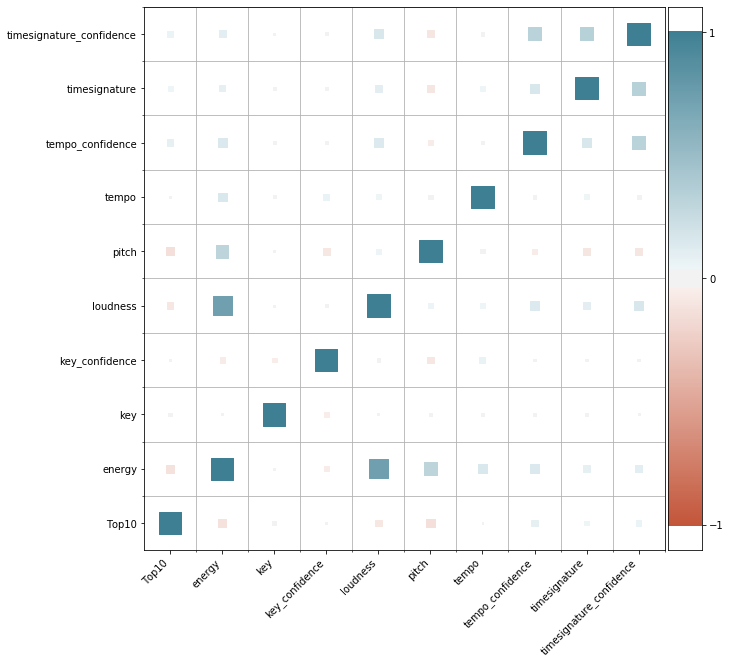

In [275]:
## Reference Source: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
## https://medium.com/@dgkadesewa/thanks-for-this-i-tried-to-use-your-code-but-got-an-error-here-6deb35eb3b8e

def heatmap(x, y, size,color):
    fig, ax = plt.subplots(figsize=(10,10))
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot

    
    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
        ind = int(val_position * (n_colors - 1)) # target index in the color palette
        return palette[ind]

    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s', # Use square as scatterplot marker
        c= color.apply(value_to_color) # Vector of square color values, mapped to color palette
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 

    
data = SongsTrain
cols = ['timesignature','timesignature_confidence','key','key_confidence','tempo','tempo_confidence','loudness',\
        'Top10','energy','pitch']
columns = (cols) #SongsTrain.columns[:9]
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']


heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color = corr['value']

)


### <div class = 'alert alert-info'> In the above correlation matrix we see that:<br><ol><li>As our focus is on the dependent variable(Top10), I will be talking about Top10 only unless there is a noticable observation on other feature.</li><br><li> First, the size of the squares give us an idea of the magnitude of the value which is color coded range: red ~ (-1), light blue ~ (0) and blue ~ (1)</li><br><li> Apart from the diagonal, for Top10 we observe as mentioned in the question that the confidence columns are more related to Top10 column for timesignature, key and tempo. Individually these columns hardly have any magnitude associated with them.</li><br><li> It looks like timesignature_confidence, key_confidence and tempo_confidence have a positive correlationship with the Top10 column.</li></ol></div>  

In [276]:
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.335207
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7168
Method:                           MLE   Df Model:                           32
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.1977
Time:                        09:58:38   Log-Likelihood:                -2413.8
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                1.373e-229
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
timesignature                0.2818      0.089      3.162      0.002       0.107

In [241]:
result.conf_int()

,0,1
timesignature,0.107124,0.456504
timesignature_confidence,0.347421,1.115528
loudness,0.063695,0.112094
tempo,-0.000923,0.005586
tempo_confidence,0.304750,0.859761
key,-0.000100,0.040250
key_confidence,0.041817,0.591066
energy,-1.242980,-0.102954
pitch,-56.489017,-29.832029
timbre_0_min,0.018134,0.034666


In [188]:
feature_col = list(X_train.columns)

zip(feature_col,list(regressor_result.coef_))
regressor_result.sparsify()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Q3.1)

In [145]:
## We do predictions on the X_test data.. then we will compare to y_test and calculate how the model predicted the y values 
Y_pred = logistic_regression.predict(X_test)

In [162]:
## Accuracy of a model tells us how well a model has predicted on the unknown dataset i.e. y_test 
accuracy = metrics.accuracy_score(Y_test, Y_pred)
accuracy
## Here the model accuracy is fairly good but not great. It is approximately 0.86 that means it has about (~0.14) error

0.8632707774798928